In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
os.environ["KAGGLE_CONFIG_DIR"] = "."

In [ ]:
!kaggle competitions download -c udea-ai4eng-20242
!unzip udea-ai4eng-20242

udea-ai4eng-20242.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  udea-ai4eng-20242.zip
replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
d = pd.read_csv("train.csv")
d.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


### **Now that we have uploaded our DataFrame, let's explore potential correlations between the variables in the columns.**


In [ ]:
#make sure to import matplotlib.pyplot as plt and import seaborn as sns
# List of columns to compare against 'RENDIMIENTO_GLOBAL'
columns_to_compare = ['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE", "ESTU_PRGM_DEPARTAMENTO", "ESTU_PRGM_ACADEMICO", "ESTU_PAGOMATRICULAPROPIO" ]

# Loop to create and display multiple crosstabs to see the number of occurrences per category of "RENDIMIENTO_GLOBAL"
#and the categories of the other columns
for col in columns_to_compare:
    print(f"\nCrosstab between 'RENDIMEINTO_GLOBAL' and '{col}':")
    crosstab = pd.crosstab(d['RENDIMIENTO_GLOBAL'], d[col])
    print(crosstab)


Crosstab between 'RENDIMEINTO_GLOBAL' and 'ESTU_VALORMATRICULAUNIVERSIDAD':
ESTU_VALORMATRICULAUNIVERSIDAD  Entre 1 millón y menos de 2.5 millones  \
RENDIMIENTO_GLOBAL                                                       
alto                                                             26775   
bajo                                                             72116   
medio-alto                                                       44287   
medio-bajo                                                       60870   

ESTU_VALORMATRICULAUNIVERSIDAD  Entre 2.5 millones y menos de 4 millones  \
RENDIMIENTO_GLOBAL                                                         
alto                                                               22181   
bajo                                                               33713   
medio-alto                                                         34543   
medio-bajo                                                         36993   

ESTU_VALORMATRICULAUN

In [ ]:
#Let's generate some stacked plots to observe the correlation between variables
columns_to_plot= ['ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE", "ESTU_PAGOMATRICULAPROPIO" ]


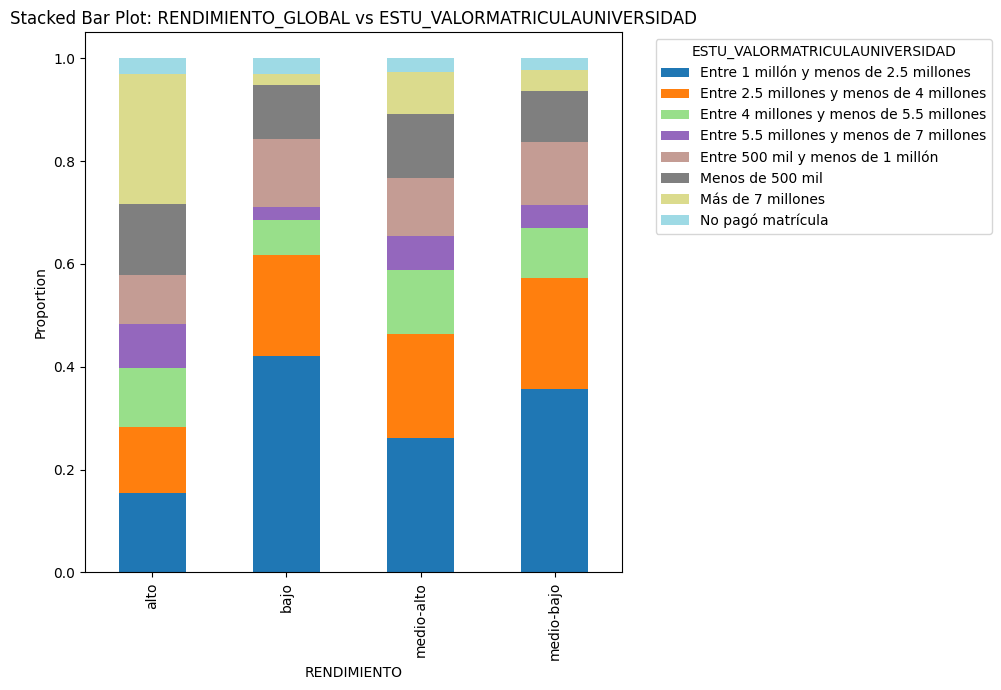

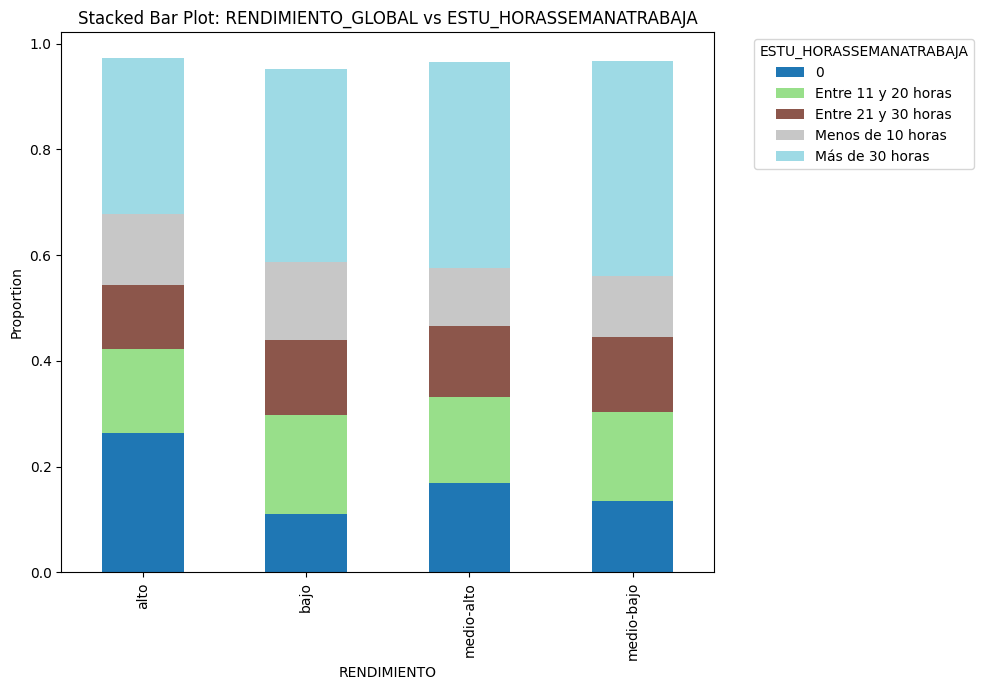

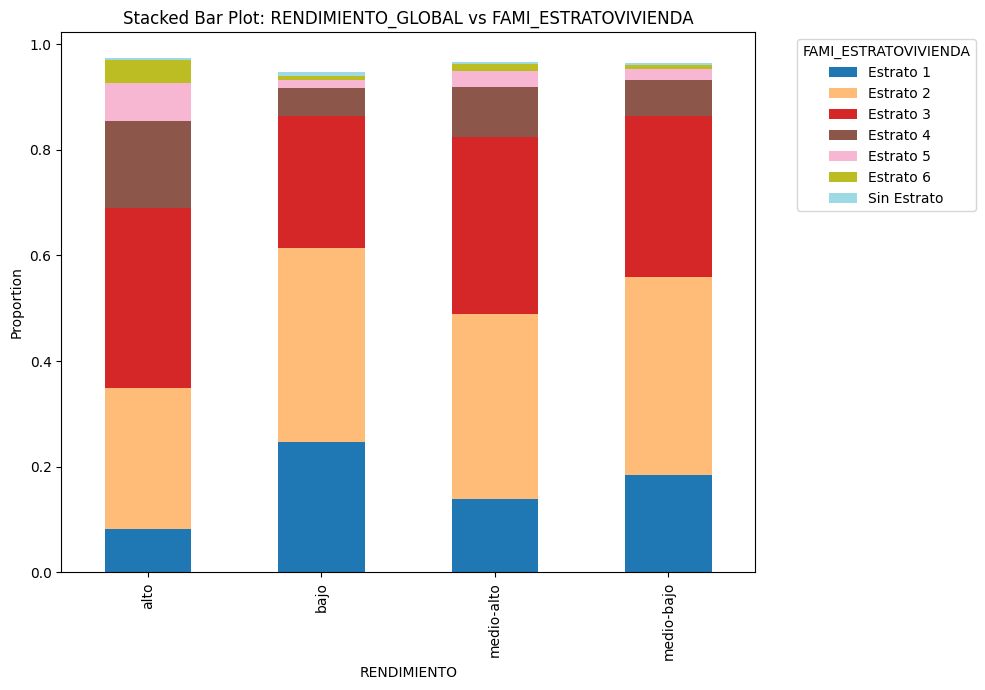

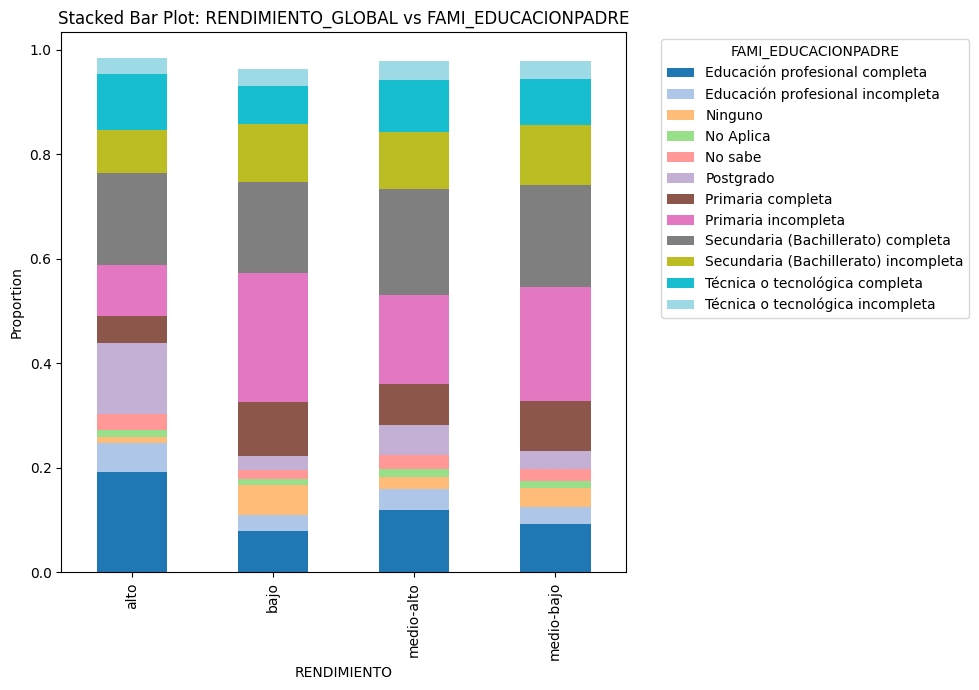

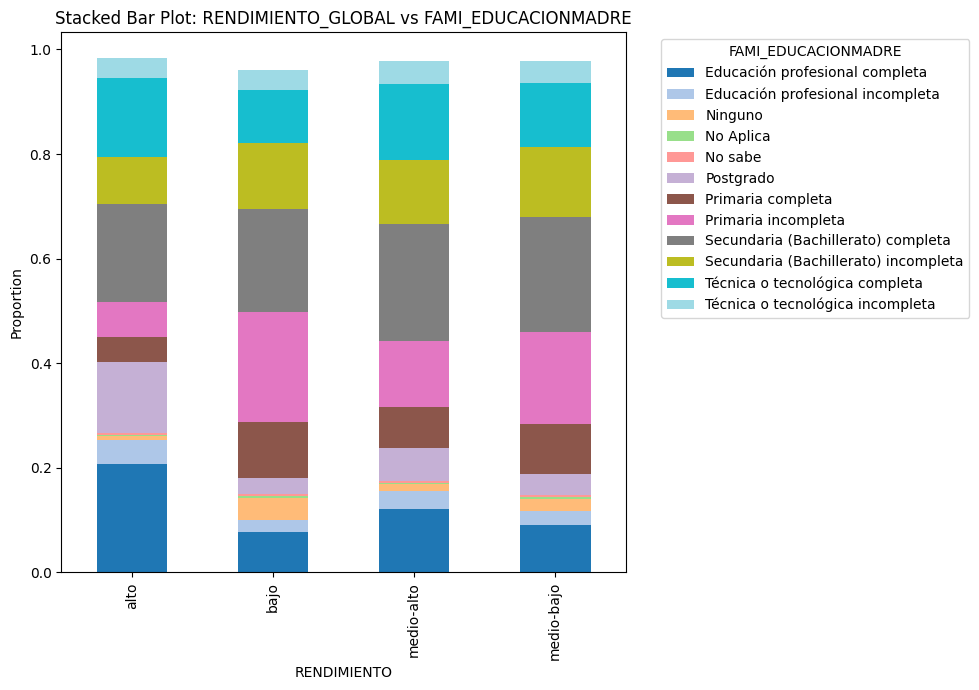

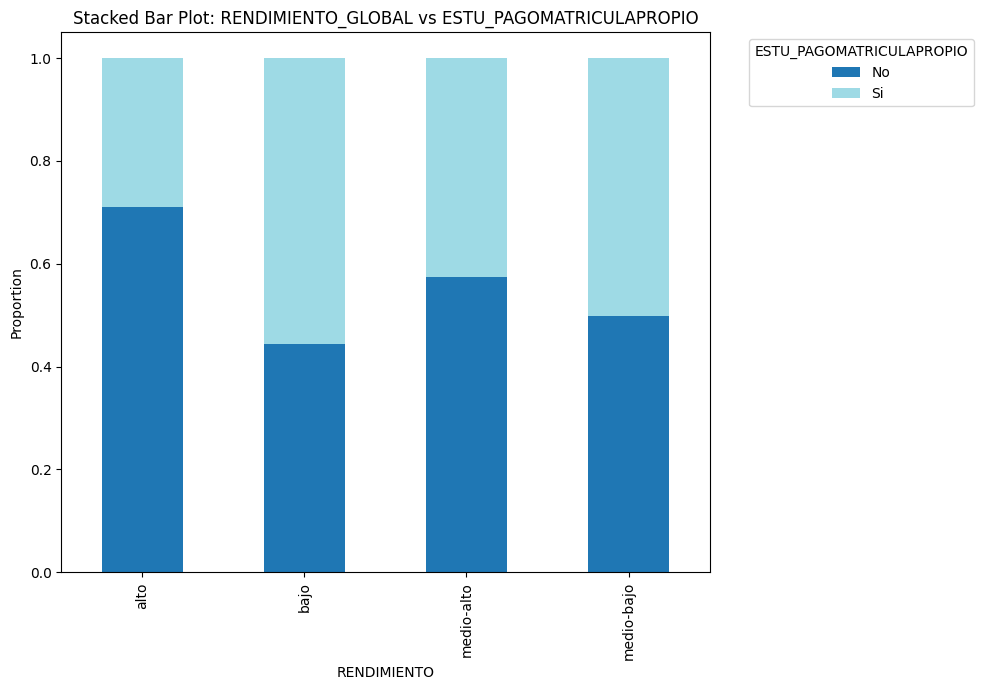

In [ ]:
#Loop to create a stacked plot for every contingency table
for col in columns_to_plot:
    # Create the crosstab or contingency table
    crosstab1 = pd.crosstab(d['RENDIMIENTO_GLOBAL'], d[col])
    # Normalize the crosstab (proportions within each row)
    crosstab_normalized = crosstab1.div(crosstab.sum(axis=1), axis=0)

    # Plot the stacked bar plot
    crosstab_normalized.plot(kind='bar', stacked=True, figsize=(10, 7), colormap='tab20')
    plt.title(f'Stacked Bar Plot: RENDIMIENTO_GLOBAL vs {col}')
    plt.xlabel('RENDIMIENTO')
    plt.ylabel('Proportion')
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()  # Adjusts plot to fit nicely
    plt.show()

Upon examining the stacked plots, we observe a correlation among the following columns: 'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA', 'FAMI_ESTRATOVIVIENDA', 'FAMI_EDUCACIONPADRE', 'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO', and 'RENDIMIENTO_GLOBAL'.

## **Evaluating and addressing missing data, along with the workflow associated with each column**

In [ ]:
#NaN values per column
d.isna().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,6287
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,32137
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,23178
FAMI_EDUCACIONMADRE,23664


A common correlation statistic used to measure the strength of association between categorical variables is Cramér's V metric.

In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

for col in columns_to_compare:
  #create the crosstab
  contingency_table = pd.crosstab(d["RENDIMIENTO_GLOBAL"], d[col])

  # Calculate Cramer's V correlation metric for categorical variables
  chi2, p, dof, expected = chi2_contingency(contingency_table)
  n = contingency_table.sum().sum()
  cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))
  print(f"Cramér's V for RENDIMIENTO_GLOBAL and {col} : {cramers_v}")


Cramér's V for RENDIMIENTO_GLOBAL and ESTU_VALORMATRICULAUNIVERSIDAD : 0.2175700780435323
Cramér's V for RENDIMIENTO_GLOBAL and ESTU_HORASSEMANATRABAJA : 0.09886432541189284
Cramér's V for RENDIMIENTO_GLOBAL and FAMI_ESTRATOVIVIENDA : 0.16584150218167515
Cramér's V for RENDIMIENTO_GLOBAL and FAMI_EDUCACIONPADRE : 0.16986450403747785
Cramér's V for RENDIMIENTO_GLOBAL and FAMI_EDUCACIONMADRE : 0.1762878277351047
Cramér's V for RENDIMIENTO_GLOBAL and ESTU_PRGM_DEPARTAMENTO : 0.11553518654990161
Cramér's V for RENDIMIENTO_GLOBAL and ESTU_PRGM_ACADEMICO : 0.26303892988917543
Cramér's V for RENDIMIENTO_GLOBAL and ESTU_PAGOMATRICULAPROPIO : 0.20133663127437282


In [ ]:
#Chose the six columns with the highest Cramer's V metric
chosen_columns = ['ESTU_VALORMATRICULAUNIVERSIDAD', 'FAMI_ESTRATOVIVIENDA', "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE", "ESTU_PRGM_ACADEMICO", "ESTU_PAGOMATRICULAPROPIO" ]

The first approach will be to impute missing data in the input columns which possess the highest Cramer's V metric, using the proportion of ocurrences of those variables for every category of "RENDIMIENTO_GLOBAL" (proportions shown in a normalized contingency table).

In [ ]:
# Define a function to impute missing values based on the proportions in the contingency table
# Precompute contingency tables for all columns in new_columns_to_compare
contingency_tables = {
    column: pd.crosstab(d["RENDIMIENTO_GLOBAL"], d[column]).div(
        pd.crosstab(d["RENDIMIENTO_GLOBAL"], d[column]).sum(axis=1), axis=0
    )
    for column in chosen_columns
}

# Define the imputation function
def impute_based_on_proportion(row, contingency_tables):
    for column in chosen_columns:
        if pd.isna(row[column]):
            # Get the proportions for "RENDIMIENTO_GLOBAL" from precomputed table
            proportions = contingency_tables[column].loc[row["RENDIMIENTO_GLOBAL"]].values
            categories = contingency_tables[column].columns

            # Impute a value based on the proportions
            row[column] = np.random.choice(categories, p=proportions)

    # Return the entire row after checking all columns
    return row

# Apply the imputation function to the DataFrame using precomputed tables
X = d.apply(lambda row: impute_based_on_proportion(row, contingency_tables), axis=1)

In [ ]:
#Check if the imputation was crried out successfully
# Create a DataFrame with unique values and their counts
UNI_COUNT_PER_COL = X.apply(lambda col: pd.Series({
    'UNIQUE VALUES': col.unique(),
    'COUNT': len(col.unique())
}))

# Display the information
print(UNI_COUNT_PER_COL)

                                                              ID  \
UNIQUE VALUES  [904256, 645256, 308367, 470353, 989032, 65987...   
COUNT                                                     692500   

                                                         PERIODO  \
UNIQUE VALUES  [20212, 20203, 20195, 20183, 20194, 20213, 201...   
COUNT                                                          9   

                                             ESTU_PRGM_ACADEMICO  \
UNIQUE VALUES  [ENFERMERIA, DERECHO, MERCADEO Y PUBLICIDAD, A...   
COUNT                                                        948   

                                          ESTU_PRGM_DEPARTAMENTO  \
UNIQUE VALUES  [BOGOTÁ, ATLANTICO, SANTANDER, ANTIOQUIA, HUIL...   
COUNT                                                         31   

                                  ESTU_VALORMATRICULAUNIVERSIDAD  \
UNIQUE VALUES  [Entre 5.5 millones y menos de 7 millones, Ent...   
COUNT                                       

In [ ]:
#Check if null values are gone
X.isna().sum()

,0
ID,0
PERIODO,0
ESTU_PRGM_ACADEMICO,0
ESTU_PRGM_DEPARTAMENTO,0
ESTU_VALORMATRICULAUNIVERSIDAD,0
ESTU_HORASSEMANATRABAJA,30857
FAMI_ESTRATOVIVIENDA,0
FAMI_TIENEINTERNET,26629
FAMI_EDUCACIONPADRE,0
FAMI_EDUCACIONMADRE,0


In [ ]:
#Create a new DataFrame containing the input features and the target variable
final_columns = ['ESTU_VALORMATRICULAUNIVERSIDAD', 'FAMI_ESTRATOVIVIENDA', "FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE", "ESTU_PRGM_ACADEMICO", "ESTU_PAGOMATRICULAPROPIO", "RENDIMIENTO_GLOBAL" ]
DF = X[final_columns]
DF.head()

,ESTU_VALORMATRICULAUNIVERSIDAD,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PRGM_ACADEMICO,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,Entre 5.5 millones y menos de 7 millones,Estrato 3,Técnica o tecnológica incompleta,Postgrado,ENFERMERIA,No,medio-alto
1,Entre 2.5 millones y menos de 4 millones,Estrato 3,Técnica o tecnológica completa,Técnica o tecnológica incompleta,DERECHO,No,bajo
2,Entre 2.5 millones y menos de 4 millones,Estrato 3,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,MERCADEO Y PUBLICIDAD,No,bajo
3,Entre 4 millones y menos de 5.5 millones,Estrato 4,No sabe,Secundaria (Bachillerato) completa,ADMINISTRACION DE EMPRESAS,No,alto
4,Entre 2.5 millones y menos de 4 millones,Estrato 3,Primaria completa,Primaria completa,PSICOLOGIA,No,medio-bajo


## **Standardization and one-hot encoding of input features and target variable**

We need to convert some features with an inherent order into continuous variables

In [ ]:
#Create a copy of DF
DF_COPY = DF.copy()

In [ ]:
pd.unique(DF_COPY['ESTU_VALORMATRICULAUNIVERSIDAD'])

array(['Entre 5.5 millones y menos de 7 millones',
       'Entre 2.5 millones y menos de 4 millones',
       'Entre 4 millones y menos de 5.5 millones', 'Más de 7 millones',
       'Entre 1 millón y menos de 2.5 millones',
       'Entre 500 mil y menos de 1 millón', 'Menos de 500 mil',
       'No pagó matrícula'], dtype=object)

In [ ]:
# Define the manual mapping for "ESTU_VALORMATRICULAUNIVERSIDAD"
DICT_VAL_MATRI= {"Entre 5.5 millones y menos de 7 millones": 6.25, 'Entre 2.5 millones y menos de 4 millones': 3.25, 'Entre 4 millones y menos de 5.5 millones': 4.75, 'Más de 7 millones':7, 'Entre 1 millón y menos de 2.5 millones':1.75,'Entre 500 mil y menos de 1 millón':0.75, 'Menos de 500 mil':0.5, 'No pagó matrícula':0}
# Apply the mapping to the 'ESTU_VALORMATRICULAUNIVERSIDAD' column
DF_COPY.loc[:,'ESTU_VALORMATRICULAUNIVERSIDAD'] = DF_COPY["ESTU_VALORMATRICULAUNIVERSIDAD"].map(DICT_VAL_MATRI)


In [ ]:
pd.unique(DF_COPY["FAMI_ESTRATOVIVIENDA"])

array(['Estrato 3', 'Estrato 4', 'Estrato 5', 'Estrato 2', 'Estrato 1',
       'Estrato 6', 'Sin Estrato'], dtype=object)

In [ ]:
# Define the manual mapping for "FAMI_ESTRATOVIVIENDA"

DICT_ESTRATO= {"Estrato 1": 1, 'Estrato 2': 2, 'Estrato 3': 3, 'Estrato 4':4, 'Estrato 5':5,'Estrato 6':6, 'Sin Estrato':0}
# Apply the mapping to the 'ESTU_VALORMATRICULAUNIVERSIDAD' column
DF_COPY.loc[:,'FAMI_ESTRATOVIVIENDA'] = DF_COPY["FAMI_ESTRATOVIVIENDA"].map(DICT_ESTRATO)


In [ ]:
pd.unique(DF_COPY["RENDIMIENTO_GLOBAL"])

array(['medio-alto', 'bajo', 'alto', 'medio-bajo'], dtype=object)

In [ ]:
DICT_RENDIMIENTO= {"medio-alto": 2, 'bajo': 0, 'medio-bajo': 1, 'alto':3}
# Apply the mapping to the 'RENDIMIENTO_GLOBALD' column
DF_COPY.loc[:,'RENDIMIENTO_GLOBAL'] = DF_COPY["RENDIMIENTO_GLOBAL"].map(DICT_RENDIMIENTO)

In [ ]:
DF_COPY

,ESTU_VALORMATRICULAUNIVERSIDAD,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PRGM_ACADEMICO,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,6.25,3,Técnica o tecnológica incompleta,Postgrado,ENFERMERIA,No,2
1,3.25,3,Técnica o tecnológica completa,Técnica o tecnológica incompleta,DERECHO,No,0
2,3.25,3,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,MERCADEO Y PUBLICIDAD,No,0
3,4.75,4,No sabe,Secundaria (Bachillerato) completa,ADMINISTRACION DE EMPRESAS,No,3
4,3.25,3,Primaria completa,Primaria completa,PSICOLOGIA,No,1
...,...,...,...,...,...,...,...
692495,0.75,2,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,BIOLOGIA,Si,2
692496,3.25,3,Primaria incompleta,Secundaria (Bachillerato) incompleta,PSICOLOGIA,No,0
692497,1.75,3,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) incompleta,ADMINISTRACIÓN EN SALUD OCUPACIONAL,Si,1
692498,3.25,1,Primaria completa,Primaria completa,PSICOLOGIA,Si,0


**The next approach will be to standardize continue variables, excep for "RENDIMIENTO_GLOBAL" which is the target variable, and one-hot encode categorical variables**

In [ ]:
DF_COPY_02 = DF_COPY[["FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE", "ESTU_PAGOMATRICULAPROPIO"]]

In [ ]:
from sklearn.preprocessing import StandardScaler
#Standardize columns containing continue variables
# DF is my future set
scaler = StandardScaler()
#Select continue variables from DF
DF_CONT = DF_COPY[["ESTU_VALORMATRICULAUNIVERSIDAD",'FAMI_ESTRATOVIVIENDA']]
standardized_f = scaler.fit_transform(DF_CONT)  # Fit and transform the features


In [ ]:
#One-hot encode columns containing categorical variables
DF_ENCODED = pd.get_dummies(DF_COPY_02, columns=["FAMI_EDUCACIONPADRE", "FAMI_EDUCACIONMADRE", "ESTU_PAGOMATRICULAPROPIO"], drop_first=True).astype(int)

In [ ]:
DF_ENCODED

,FAMI_EDUCACIONPADRE_Educación profesional incompleta,FAMI_EDUCACIONPADRE_Ninguno,FAMI_EDUCACIONPADRE_No Aplica,FAMI_EDUCACIONPADRE_No sabe,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,FAMI_EDUCACIONPADRE_Primaria incompleta,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE_Técnica o tecnológica completa,...,FAMI_EDUCACIONMADRE_No Aplica,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,ESTU_PAGOMATRICULAPROPIO_Si
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
692496,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
692497,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
692498,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
# Convert standardized array back to DataFrame
standardized_df = pd.DataFrame(standardized_f, columns=["ESTU_VALORMATRICULAUNIVERSIDAD",'FAMI_ESTRATOVIVIENDA'])
standardized_df


,ESTU_VALORMATRICULAUNIVERSIDAD,FAMI_ESTRATOVIVIENDA
0,1.628914,0.428610
1,0.213903,0.428610
2,0.213903,0.428610
3,0.921409,1.319815
4,0.213903,0.428610
...,...,...
692495,-0.965272,-0.462595
692496,0.213903,0.428610
692497,-0.493602,0.428610
692498,0.213903,-1.353801


In [ ]:
# Combine standardized DataFrame with one-hot encoded DataFrame
#The final_df will be used as the DataFrame for training
final_df = pd.concat([standardized_df, DF_ENCODED, DF_COPY['RENDIMIENTO_GLOBAL']], axis=1)

In [ ]:
final_df

,ESTU_VALORMATRICULAUNIVERSIDAD,FAMI_ESTRATOVIVIENDA,FAMI_EDUCACIONPADRE_Educación profesional incompleta,FAMI_EDUCACIONPADRE_Ninguno,FAMI_EDUCACIONPADRE_No Aplica,FAMI_EDUCACIONPADRE_No sabe,FAMI_EDUCACIONPADRE_Postgrado,FAMI_EDUCACIONPADRE_Primaria completa,FAMI_EDUCACIONPADRE_Primaria incompleta,FAMI_EDUCACIONPADRE_Secundaria (Bachillerato) completa,...,FAMI_EDUCACIONMADRE_No sabe,FAMI_EDUCACIONMADRE_Postgrado,FAMI_EDUCACIONMADRE_Primaria completa,FAMI_EDUCACIONMADRE_Primaria incompleta,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) completa,FAMI_EDUCACIONMADRE_Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONMADRE_Técnica o tecnológica completa,FAMI_EDUCACIONMADRE_Técnica o tecnológica incompleta,ESTU_PAGOMATRICULAPROPIO_Si,RENDIMIENTO_GLOBAL
0,1.628914,0.428610,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
1,0.213903,0.428610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.213903,0.428610,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.921409,1.319815,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
4,0.213903,0.428610,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,-0.965272,-0.462595,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,2
692496,0.213903,0.428610,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
692497,-0.493602,0.428610,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,1
692498,0.213903,-1.353801,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
